# Additional Visualizations
Section: b. Examine if there is a correlation between customers’ age and the acceptance rate of the last campaign

**Part of:** [marketing_campaign_082825_working.ipynb](./marketing_campaign_082825_working.ipynb)

In [1]:
# Setup and data loading
from utils import (
    ProjectConfig,
    load_intermediate_results,
    save_project_figure,
    reset_plot_settings,
)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

config = ProjectConfig()
# Load data from previous notebook
df = load_intermediate_results("data_from_08_step_6.pkl", config)


## b. Examine if there is a correlation between customers’ age and the acceptance rate of the last campaign

In [2]:
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(df['Age'], df['Response'])
print(f"Point-Biserial Correlation between Age and Response: {corr:.3f} (p-value: {p_value:.3f})")

# What is Point-Biserial Correlation?
# Point-biserial correlation is chosen because it is a statistical measure that quantifies
# the linear relationship between a continuous variable and a binary variable.
# It's essentially a special case of the standard Pearson correlation coefficient,
# specifically designed for binary outcomes.

# Why I used
# In campaign analysis, you have:
# - Binary variable: Campaign response (Accepted = 1, Not Accepted = 0)
# - Continuous variable: Age (ranging from ~30 to 80+)

# Output: correlation ≈ -0.019, p-value ≈ 0.372, indicating a very weak, non-significant
# relationship. Younger customers may have a slight tendency to accept the campaign,
# but the effect is negligible.

Point-Biserial Correlation between Age and Response: -0.019 (p-value: 0.372)


In [3]:
# Statistics to use for age analysis for last campaign response
# Data will be used in plots

accepted = df[df['Response'] == 1]['Age']
not_accepted = df[df['Response'] == 0]['Age']

# Create age groups
bins = [0, 40, 50, 60, 70, 100]
labels = ['<40', '40-50', '50-60', '60-70', '70+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
print(df['Age_Group'].value_counts())

age_analysis = df.groupby('Age_Group').agg({
    'Response': ['sum','count','mean'],
    'Age': ['mean','std']}).round(3)

age_analysis.columns = ['Accepted_Count','Total_Count','Acceptance_Rate','Mean_Age','Age_SD']
age_analysis['Sample_Size_Category'] = pd.qcut(age_analysis['Total_Count'],
                                              q=3,
                                              labels=['Small','Medium','Large'])

print(age_analysis)

Age_Group
50-60    674
40-50    552
60-70    467
70+      315
<40      221
Name: count, dtype: int64
           Accepted_Count  Total_Count  Acceptance_Rate  Mean_Age  Age_SD  \
Age_Group                                                                   
<40                    36          221            0.163    36.774   2.631   
40-50                  84          552            0.152    46.293   2.873   
50-60                 101          674            0.150    55.202   2.847   
60-70                  63          467            0.135    65.694   2.863   
70+                    50          315            0.159    74.622   2.992   

          Sample_Size_Category  
Age_Group                       
<40                      Small  
40-50                    Large  
50-60                    Large  
60-70                   Medium  
70+                      Small  


Saved: figures\Age_Distribution_by_Campaign_Response.png


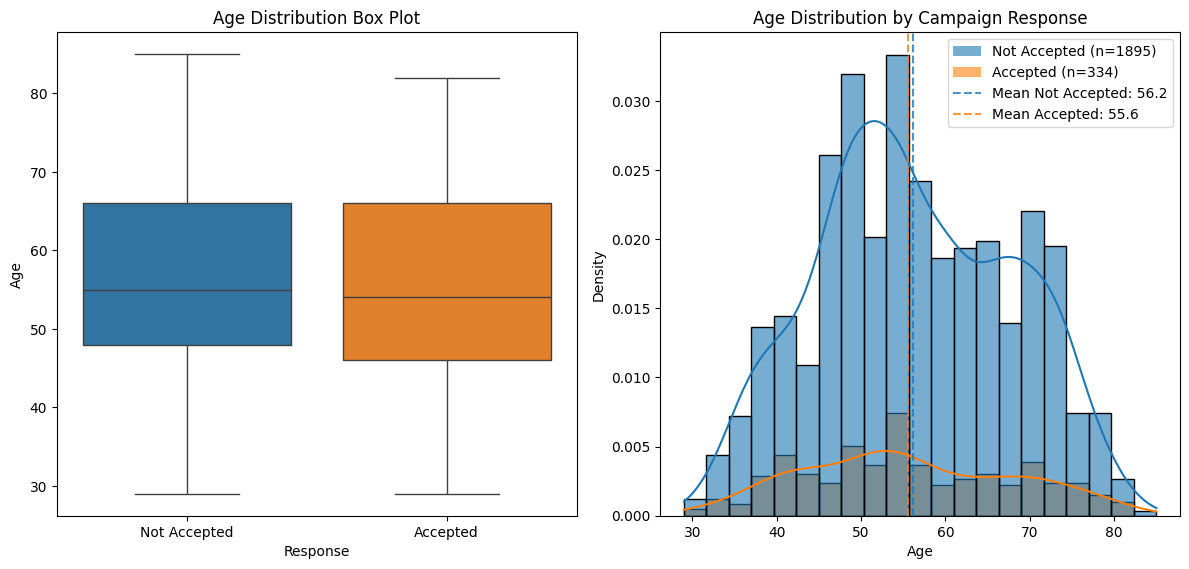

In [4]:
# Visualizations
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

reset_plot_settings()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

# Define colors upfront
# Use matplotlib's palette
sns.set_palette("tab10")
matplot_colors = sns.color_palette("tab10")
matplot_blue = matplot_colors[0]
matplot_orange = matplot_colors[1]

# Age group acceptance rates
acceptance_rates = age_analysis['Acceptance_Rate']
sample_sizes = age_analysis['Total_Count']

# Box Plot with statistical results
sns.boxplot(x='Response', y='Age', data=df, hue='Response', ax=ax1,
            palette='tab10', legend=False)
ax1.set_xlabel('Response')
ax1.set_xticks([0,1], ['Not Accepted', 'Accepted'])
ax1.set_title('Age Distribution Box Plot')
ax1.set_ylabel('Age')

# Distribution comparison with statistical annotation
# Create subsets
not_accepted = df[df['Response'] == 0]['Age']
accepted = df[df['Response'] == 1]['Age']

# Create labels with counts
df['Response_Label'] = df['Response'].map({
    0: f'Not Accepted (n={len(not_accepted)})',
    1: f'Accepted (n={len(accepted)})'
})

# Create histogram with specific colors
sns.histplot(data=df, x='Age', hue='Response_Label',
             kde=True, stat='density', ax=ax2, alpha=0.6,
             hue_order=[f'Not Accepted (n={len(not_accepted)})', f'Accepted (n={len(accepted)})'],
             palette='tab10', legend=False)

# Add mean lines with matching colors
ax2.axvline(not_accepted.mean(), color=matplot_blue, linestyle='--', alpha=0.8)
ax2.axvline(accepted.mean(), color=matplot_orange, linestyle='--', alpha=0.8)

# Create legend manually
legend_elements = [
    Patch(facecolor=matplot_blue, alpha=0.6, label=f'Not Accepted (n={len(not_accepted)})'),
    Patch(facecolor=matplot_orange, alpha=0.6, label=f'Accepted (n={len(accepted)})'),
    Line2D([0], [0], color=matplot_blue, linestyle='--', alpha=0.8,
           label=f'Mean Not Accepted: {not_accepted.mean():.1f}'),
    Line2D([0], [0], color=matplot_orange, linestyle='--', alpha=0.8,
           label=f'Mean Accepted: {accepted.mean():.1f}')
]

ax2.legend(handles=legend_elements)

# Set titles and labels
ax2.set_title(f'Age Distribution by Campaign Response\n'
              f'Mean Difference: {accepted.mean() - not_accepted.mean():.2f} years')
ax2.set_xlabel('Age')
ax2.set_ylabel('Density')


plt.tight_layout()
save_project_figure(
    "Age_Distribution_by_Campaign_Response",
    "Age Distribution by Campaign Response",
    config,
)
plt.show()

In [5]:
# Results and possible conclusions from intial visualizations show that age does
# not seem to be correlated strongly to age. This is based on the point-biserial
# correlation and the boxplots and histogram plots which show if anything
# younger customers have a slight tendency to accept the campaign.

# Below several other visualizations are created to explore the age versus
# campaign response.

           Accepted_Count  Total_Count  Acceptance_Rate  Mean_Age  Age_SD  \
Age_Group                                                                   
<40                    36          221            0.163    36.774   2.631   
40-50                  84          552            0.152    46.293   2.873   
50-60                 101          674            0.150    55.202   2.847   
60-70                  63          467            0.135    65.694   2.863   
70+                    50          315            0.159    74.622   2.992   

          Sample_Size_Category  
Age_Group                       
<40                      Small  
40-50                    Large  
50-60                    Large  
60-70                   Medium  
70+                      Small  
Saved: figures\Age_Distribution_by_Campaign_Response_Significance.png


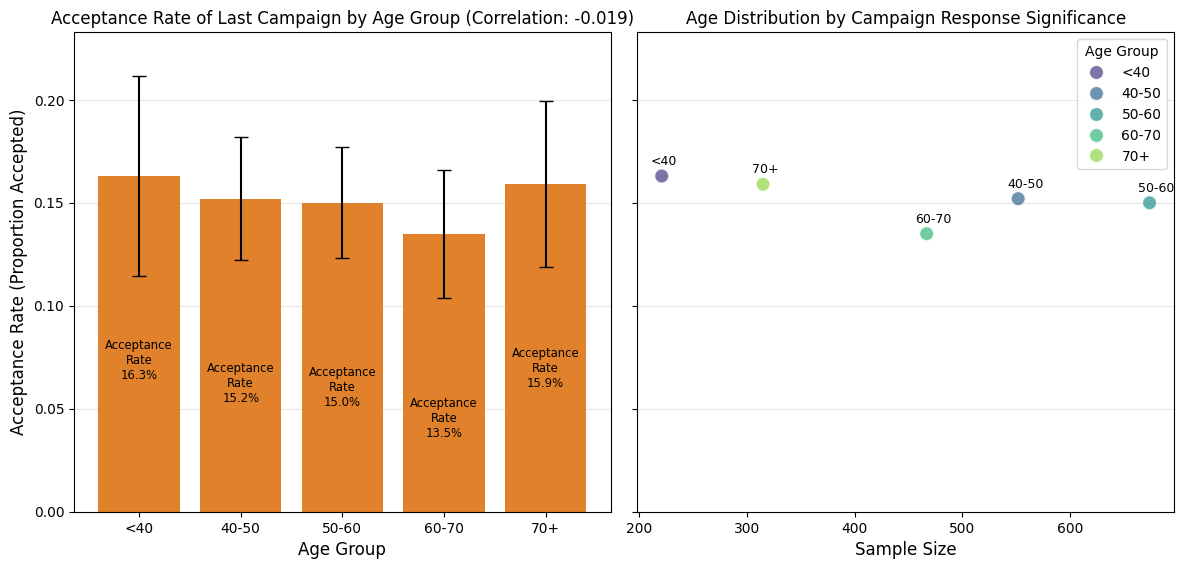

In [6]:
reset_plot_settings()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6), sharey=True)

# Bar plot of acceptance rates
# Age group acceptance rates with confidence intervals
acceptance_rates = age_analysis['Acceptance_Rate']
sample_sizes = age_analysis['Total_Count']

# Calculate 95% confidence intervals for proportions
z_score = 1.96  # 95% confidence
ci_lower = []
ci_upper = []

for rate, n in zip(acceptance_rates, sample_sizes):
    se = np.sqrt(rate * (1 - rate) / n)  # Standard error for proportion
    ci_lower.append(max(0, rate - z_score * se))
    ci_upper.append(min(1, rate + z_score * se))

#print(age_analysis[['Age_Group','Acceptance_Rate','Total_Count']])
print(age_analysis)

bars = sns.barplot(x='Age_Group', y='Acceptance_Rate', data=age_analysis,
                   errorbar=None, color=matplot_orange,
                   ax=ax1)
ax1.errorbar(x=range(len(acceptance_rates)), y=acceptance_rates,
             yerr=[acceptance_rates - ci_lower, ci_upper - acceptance_rates],
             fmt='none', c='black', capsize=5)
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height - 0.1,
             f'Acceptance\nRate\n{(age_analysis["Acceptance_Rate"].iloc[i])*100}%',
             ha='center', va='bottom', fontsize='small')
ax1.set_title(f'Acceptance Rate of Last Campaign by Age Group (Correlation: {corr:.3f})', fontsize=12)
ax1.set_xlabel('Age Group', fontsize=12)
ax1.set_ylabel('Acceptance Rate (Proportion Accepted)', fontsize=12)
ax1.grid(True, axis='y', alpha=0.3)
ax1.set_axisbelow(True)
ax1.set_ylim(0, max(ci_upper) * 1.1)


# Scatterplot showing age group sample size and acceptance rate
age_analysis_reset = age_analysis.reset_index()

sns.scatterplot(data=age_analysis_reset,
                x='Total_Count',
                y='Acceptance_Rate',
                hue='Age_Group',
                s=100,
                alpha=0.7,
                ax=ax2,
                palette='viridis')

# Add annotations
for i, row in age_analysis_reset.iterrows():
    ax2.annotate(row['Age_Group'],
                (row['Total_Count'], row['Acceptance_Rate']),
                xytext=(-8, 8),
                textcoords='offset points',
                fontsize=9)

ax2.set_xlabel('Sample Size', fontsize=12)
ax2.set_ylabel('Acceptance Rate', fontsize=12)
ax2.set_title('Sample Size vs Acceptance Rate by Age Group\n(Larger samples = more reliable estimates)', fontsize=12)
ax2.grid(True, axis='y', alpha=0.3)
ax2.set_axisbelow(True)
ax2.legend(title='Age Group', loc='upper right')

plt.tight_layout()
save_project_figure(
    "Age_Distribution_by_Campaign_Response_Significance",
    "Age Distribution by Campaign Response Significance",
    config,
)
plt.show()

In [7]:
# Cleanup and summary analysis creation
df.drop('Response_Label', axis=1, inplace=True)
age_analysis_reset = age_analysis.copy()
age_analysis_reset['Acceptance_Rate_Percent'] = age_analysis_reset['Acceptance_Rate'] * 100
print(age_analysis_reset[['Sample_Size_Category','Acceptance_Rate_Percent']])

          Sample_Size_Category  Acceptance_Rate_Percent
Age_Group                                              
<40                      Small                     16.3
40-50                    Large                     15.2
50-60                    Large                     15.0
60-70                   Medium                     13.5
70+                      Small                     15.9


In [8]:
# Output: correlation, boxplots, histogram plots, bar plot with error bars and scatter
# plot show no significant age to campaign acceptance relationship

# Primary Findings
# •  Minimal Age Effect: The most striking finding is that age has virtually no meaningful
#    relationship with campaign acceptance. The correlation of -0.019 is essentially zero,
#    indicating no practical relationship between age and response rates (very weak,
#    non-significant relationship).
# •  Consistent Acceptance Across Age Groups: The acceptance rates across all age groups
#    cluster between 13-16%, with the 60-70 age group showing the lowest rate at approximately
#    13% and the <40 and 70+ groups showing the highest at around 16%. This 3
#    percentage point difference is quite small from a practical standpoint.

# Statistical Considerations
# •  Sample Size Reliability: The scatterplot reveals that the 60-70 age group has the
#    smallest sample size (467), while the 50-60 group has the largest (674).
#    The smaller sample size for the 60-70 group may contribute to the slightly lower observed
#    acceptance rate, but the confidence intervals shown in the bar chart suggest these
#    differences aren't statistically significant.
# •  Age Distribution Insights: The first chart shows that both accepted and non-accepted
#    groups have very similar age distributions, with mean ages differing by only 0.62 years
#    (56.2 vs 55.6). This minimal difference reinforces that age is not a meaningful predictor.

# Result
# Campaign acceptance does not seem to be correlated strongly to age.

In [9]:

# Save results for next notebook
# save_intermediate_results(df_processed, 'processed_data.pkl', config)
# save_intermediate_results(analysis_results, 'analysis_results.pkl', config)
# print('✓ Results saved for next notebook')